In [55]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [37]:
class DDM():
    def __init__(self, v = 0.6, a = 1, ter = 0.2, z = 0):
        self.xstep = 0.05 
        self.ystep = 0.05
        self.v = v
        self.a = a
        self.start = a/2 + z
        self.ter = ter
        
    def run(self, n=100):
        res = []
        
        for i in range(n):
            x = self.ter
            y = self.start
            trace = [[x, y]]
            while y > 0 and y < self.a:
                if rnd.uniform(0, 1) < self.v:
                    y += self.ystep
                    #print(y)
                else:
                    y -= self.ystep
                x += self.xstep
                
                trace.append([x, y])
            
            res.append(trace)
        
        return res
    

1593
8407


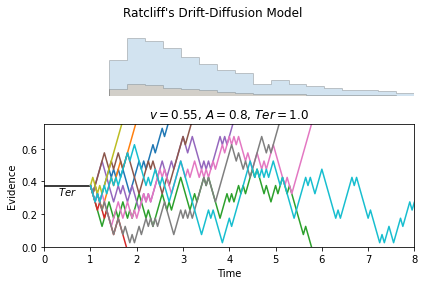

In [194]:
#fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=(5,5), gridspec_kw={'height_ratios': [1, 2, 1]})

d = DDM(z=0., v = 0.55, ter=1.0, a= 0.75)
traces = d.run(10000)

times_a = [x[-1][0] for x in traces if x[-1][1] > d.a]
times_0 = [x[-1][0] for x in traces if x[-1][1] < 0]
print(len(times_0))
print(len(times_a))

fig, (axs1, axs2) = plt.subplots(2, 1, figsize=(6,4), gridspec_kw={'height_ratios': [1, 2]})

max_time = 8

axs1.set_xlim(0, max_time)
axs2.set_xlim(0, max_time)
#axs3.set_xlim(0, max_time)

for ax in (axs1,):#, axs3):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
    #ax.set_ylim(0, 2000)
    #axs3.set_ylim(0, 10)

axs2.set_ylim(0, d.a)
axs2.set_ylabel("Evidence")
axs2.set_xlabel("Time")

#axs3.invert_yaxis()

# The traces

axs2.plot([0, d.ter], [d.start, d.start], "k")
axs2.text(s=r"$Ter$", x=d.ter/2, y = d.start, ha='center', va = 'top')
subset = rnd.choices(traces, k=10)

for trace in subset:
    data = np.array(trace)
    axs2.plot(data[:,0], data[:,1])

axs2.set_title(r"$v = %.2f$, $A = %.1f$, $Ter = %.1f$" % (d.v, d.a, d.ter)) 
kwargs = dict(histtype='stepfilled', alpha=0.2, density=False, bins=50, ec="k")
axs1.hist((times_a, times_0), **kwargs)
#axs3.hist((times_a, times_0), **kwargs)
fig.suptitle("Ratcliff's Drift-Diffusion Model")
fig.tight_layout()
plt.savefig("figures/ddm.png")
plt.show()


In [8]:
class LBA:
    def __init__(self, v, a, vsd=0.1):
        self.v = v
        self.a = a
        self.vsd = vsd
        


0.37213501918862557